In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

In [90]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_1724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [91]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,Outros_moluscos,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [92]:
x0 = df[['Ano', 'TOTAL_MOLLUSCS']].dropna().values

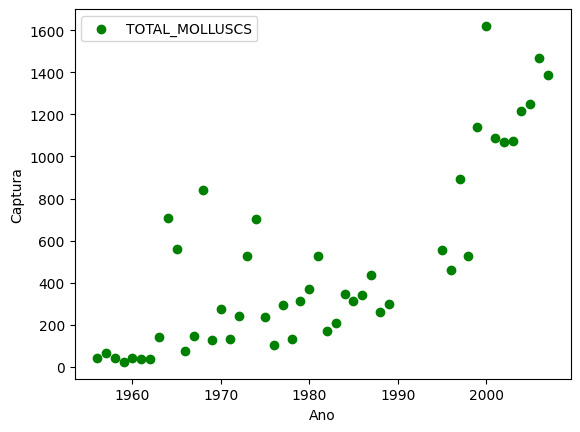

In [93]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='TOTAL_MOLLUSCS')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [94]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'TOTAL_MOLLUSCS'])

In [95]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['TOTAL_MOLLUSCS'], dtype= np.float32).reshape(-1, 1)
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [96]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 50: loss = 0.16909930109977722
Epoch 100: loss = 0.17545883357524872
Epoch 150: loss = 0.161257803440094
Epoch 200: loss = 0.16127333045005798
Epoch 250: loss = 0.15215043723583221
Epoch 300: loss = 0.1490372270345688
Epoch 350: loss = 0.14694662392139435
Epoch 400: loss = 0.14314070343971252
Epoch 450: loss = 0.15064719319343567
Epoch 500: loss = 0.13550320267677307
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


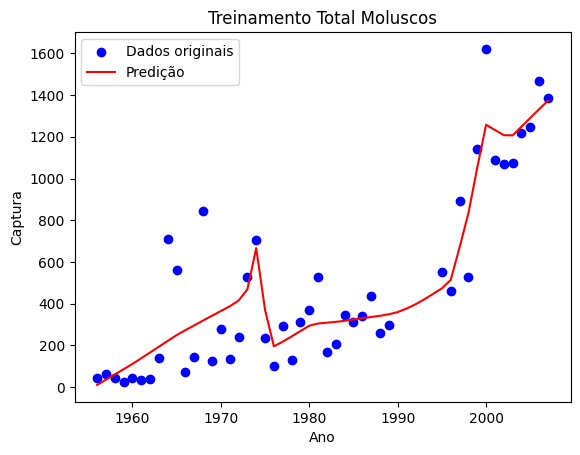

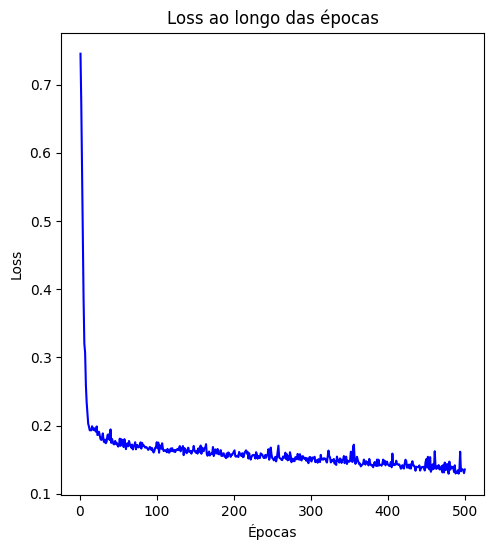

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=50) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=200, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Total Moluscos')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição para o ano 1950: 0.0
Predição para o ano 1951: 0.0
Predição para o ano 1952: 0.0
Predição para o ano 1953: 0.0
Predição para o ano 1954: 0.0
Predição para o ano 1955: 0.0
Predição para o ano 1990: 359.9470520019531
Predição para o ano 1991: 376.82684326171875
Predição para o ano 1992: 396.981201171875
Predição para o ano 1993: 420.7916259765625
Predição para o ano 1994: 447.1544189453125
Predição para o ano 2008: 1412.107666015625
Predição para o ano 2009: 1449.414794921875
Predição para o ano 2010: 1487.260986328125
Predição para o ano 2011: 1525.09423828125
Predição para o ano 2012: 1562.606201171875
Predição para o ano 2013: 1600.1181640625
Predição para o ano 2014: 1637.63037109375
Predição para o ano 2015: 1675.142578125
Predição para o ano 2016: 1712.625
Predição para o ano 2017: 1750.107421875
Predição para o ano 2018: 1787.58984375
Predição para o ano 2019: 1823.551513671875
Predição para o ano 2020: 1859.31005859375
Predição para 

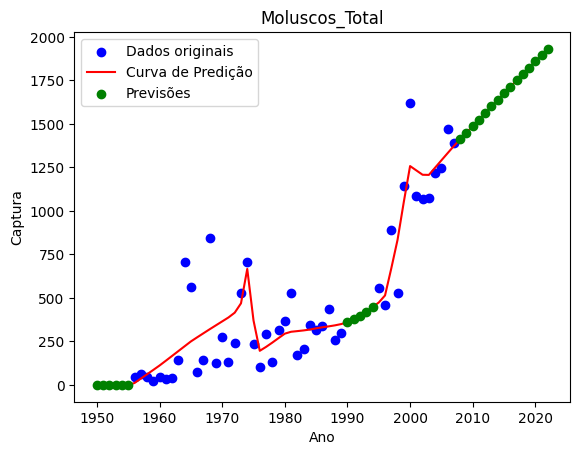

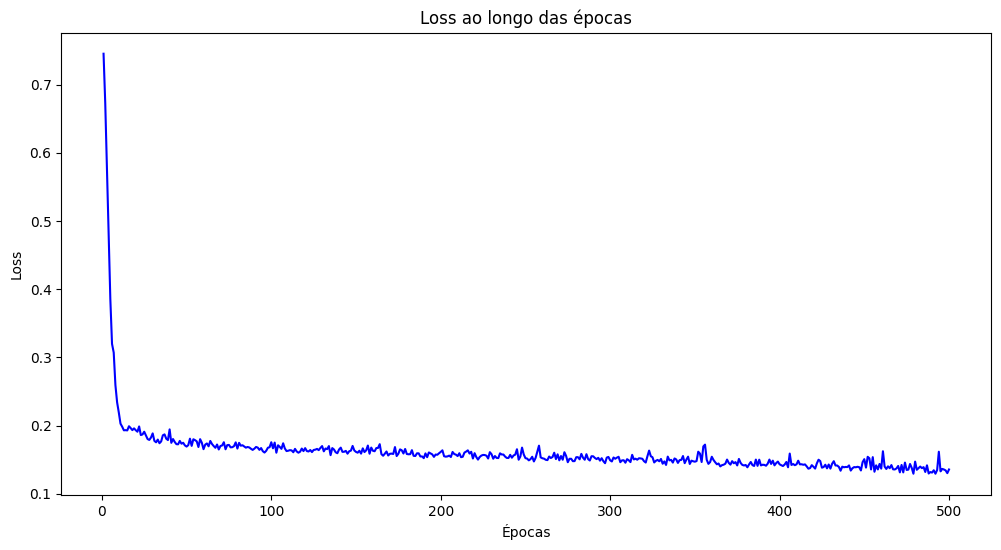

In [98]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1990, 1991, 1992, 1993, 1994, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)
for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Moluscos_Total')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [99]:
import pandas as pd
import numpy as np

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Total_Moluscos_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          0.000000
1   1951.0               NaN          0.000000
2   1952.0               NaN          0.000000
3   1953.0               NaN          0.000000
4   1954.0               NaN          0.000000
..     ...               ...               ...
68  2018.0               NaN       1787.589844
69  2019.0               NaN       1823.551514
70  2020.0               NaN       1859.310059
71  2021.0               NaN       1895.080078
72  2022.0               NaN       1930.849854

[73 rows x 3 columns]


In [100]:
df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Renan\AppData\Local\Temp\ipykernel_1724\203502866.py:1: SyntaxWarning: invalid escape sequence '\T'
  df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')


In [101]:
x0 = pd.DataFrame(df_0[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_0[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [102]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df0 = pd.DataFrame({'Ano': df_0['Ano'], 'TOTAL_MOLLUSCS': resultado})

print(novo_df0)

     Ano  TOTAL_MOLLUSCS
0   1950        0.000000
1   1951        0.000000
2   1952        0.000000
3   1953        0.000000
4   1954        0.000000
..   ...             ...
68  2018     1787.589844
69  2019     1823.551514
70  2020     1859.310059
71  2021     1895.080078
72  2022     1930.849854

[73 rows x 2 columns]


Lula Artesanal (CURVA DE PROPORÇÕES))

In [103]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_1724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [104]:
x0 = df[['Ano', 'Lula_art']].dropna().values
x1 = df[['Ano', 'Lula_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Lula_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Lula_ind'])

In [105]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')

In [106]:
print(df_combinado)

       Ano   Lula_art  TOTAL_MOLLUSCS
0   1978.0  106.00000      131.000000
1   1979.0  175.00000      314.000000
2   1980.0  335.00000      368.000000
3   1981.0  373.00000      527.000000
4   1982.0  127.00000      171.000000
5   1983.0  140.00000      206.000000
6   1984.0  209.00000      344.000000
7   1985.0  176.00000      313.000000
8   1986.0  114.00000      339.000000
9   1987.0  198.00000      436.000000
10  1988.0  112.00000      260.000000
11  1989.0  146.00000      297.000000
12  1995.0  389.50000      554.500000
13  1996.0   36.50000      460.000000
14  1997.0  104.00000      891.000000
15  1998.0   12.50000      529.000000
16  1999.0  127.50000     1140.500000
17  2000.0   14.00000     1621.000000
18  2001.0  184.50000     1086.500000
19  2002.0   88.50000     1071.000000
20  2003.0   86.50000     1072.500000
21  2004.0  101.00000     1218.000000
22  2005.0  106.50000     1249.000000
23  2006.0  122.50000     1469.500000
24  2007.0   72.50000     1387.500000
25  2008.0  

In [107]:
df_combinado['Proporção'] = df_combinado['Lula_art'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]


print(curva_de_proporcao)

       Ano  Proporção
0   1978.0   0.809160
1   1979.0   0.557325
2   1980.0   0.910326
3   1981.0   0.707780
4   1982.0   0.742690
5   1983.0   0.679612
6   1984.0   0.607558
7   1985.0   0.562300
8   1986.0   0.336283
9   1987.0   0.454128
10  1988.0   0.430769
11  1989.0   0.491582
12  1995.0   0.702435
13  1996.0   0.079348
14  1997.0   0.116723
15  1998.0   0.023629
16  1999.0   0.111793
17  2000.0   0.008637
18  2001.0   0.169811
19  2002.0   0.082633
20  2003.0   0.080653
21  2004.0   0.082923
22  2005.0   0.085268
23  2006.0   0.083362
24  2007.0   0.052252
25  2008.0   0.012435
26  2009.0   0.023824
27  2010.0   0.007181
28  2011.0   0.013503
29  2012.0   0.005682
30  2013.0   0.005997
31  2014.0   0.128136
32  2015.0   0.001503
33  2017.0   0.032547
34  2018.0   0.018966
35  2019.0   0.023012
36  2020.0   0.015824
37  2021.0   0.029983
38  2022.0   0.032853


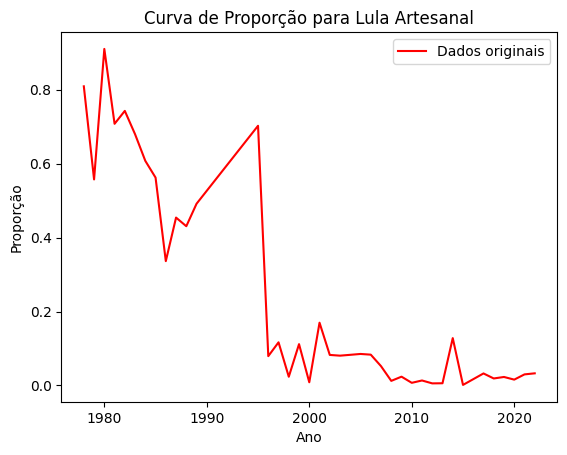

In [108]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Artesanal')
plt.legend()
plt.show()

In [111]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_art_prop.xlsx', index=False)

Lula Industrial (CURVA DE PROPORÇÕES)

In [112]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner') 
print(df_combinado)



       Ano   Lula_ind  TOTAL_MOLLUSCS
0   1978.0   20.00000      131.000000
1   1979.0  129.00000      314.000000
2   1980.0   18.00000      368.000000
3   1981.0  115.00000      527.000000
4   1982.0   20.00000      171.000000
5   1983.0   12.00000      206.000000
6   1984.0   87.00000      344.000000
7   1985.0   23.00000      313.000000
8   1986.0   57.00000      339.000000
9   1987.0   30.00000      436.000000
10  1988.0    6.00000      260.000000
11  1989.0   21.00000      297.000000
12  1996.0  286.00000      460.000000
13  1997.0  488.50000      891.000000
14  1998.0  252.50000      529.000000
15  1999.0  345.50000     1140.500000
16  2000.0  637.50000     1621.000000
17  2001.0  214.00000     1086.500000
18  2002.0  387.50000     1071.000000
19  2003.0  389.50000     1072.500000
20  2004.0  444.00000     1218.000000
21  2005.0  451.50000     1249.000000
22  2006.0  507.50000     1469.500000
23  2007.0  572.50000     1387.500000
24  2008.0    2.16700     1412.107666
25  2009.0  

In [113]:
df_combinado['Proporção'] = df_combinado['Lula_ind'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [114]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_ind_prop.xlsx', index=False)

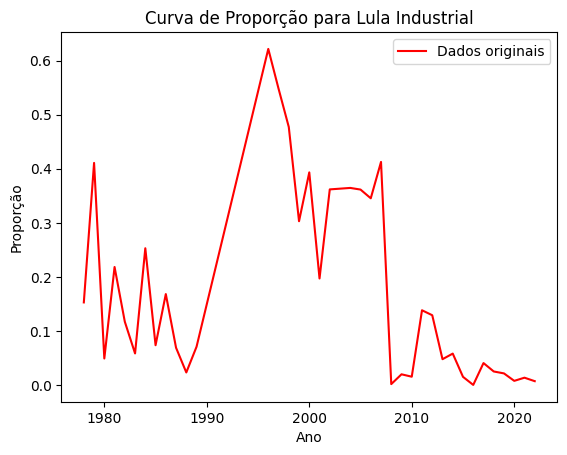

In [115]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Industrial')
plt.legend()
plt.show()

Polvo artesanal (CURVA DE PROPORÇÕES)

In [116]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_1724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [117]:
x0 = df[['Ano', 'Polvo_art']].dropna().values
x1 = df[['Ano', 'Polvo_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Polvo_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Polvo_ind'])

In [118]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')
print(df_combinado)

       Ano  Polvo_art  TOTAL_MOLLUSCS
0   1978.0    2.00000      131.000000
1   1979.0    8.00000      314.000000
2   1980.0   13.00000      368.000000
3   1981.0   14.00000      527.000000
4   1982.0    3.00000      171.000000
5   1983.0    1.00000      206.000000
6   1984.0    2.00000      344.000000
7   1985.0   12.00000      313.000000
8   1986.0    9.00000      339.000000
9   1987.0    8.00000      436.000000
10  1988.0    2.00000      260.000000
11  1989.0    6.00000      297.000000
12  1995.0  165.00000      554.500000
13  1996.0    2.00000      460.000000
14  1997.0   33.50000      891.000000
15  1998.0    5.50000      529.000000
16  1999.0   57.50000     1140.500000
17  2000.0   17.00000     1621.000000
18  2001.0   45.50000     1086.500000
19  2002.0   32.00000     1071.000000
20  2003.0   31.00000     1072.500000
21  2004.0   35.50000     1218.000000
22  2005.0   39.50000     1249.000000
23  2006.0   45.00000     1469.500000
24  2007.0   20.50000     1387.500000
25  2008.0  

In [119]:
df_combinado['Proporção'] = df_combinado['Polvo_art'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [120]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_art_prop.xlsx', index=False)

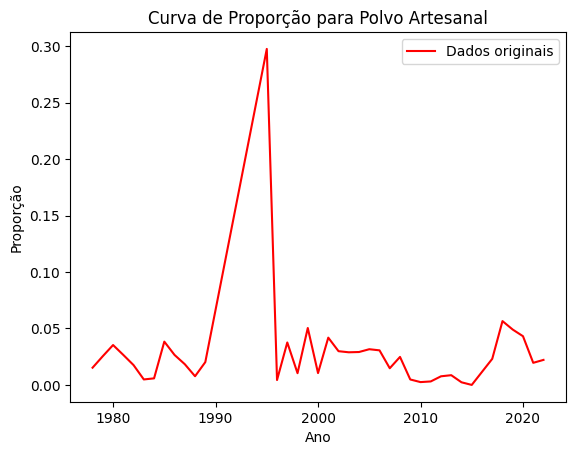

In [121]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Artesanal')
plt.legend()
plt.show()

In [122]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner')


df_combinado['Proporção'] = df_combinado['Polvo_ind'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [123]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_ind_prop.xlsx', index=False)

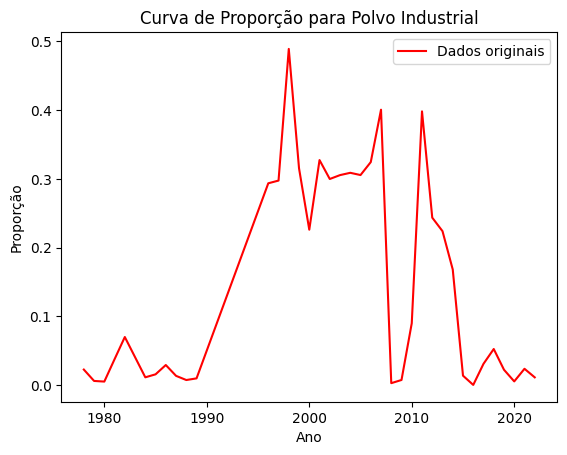

In [60]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Industrial')
plt.legend()
plt.show()

TREINAMENTO PARA AS CURVAS DE PROPORÇÕES

In [134]:
df = pd.read_excel('curvas_de_propocao/Lula_art_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.809160
1,1979,0.557325
2,1980,0.910326
3,1981,0.707780
4,1982,0.742690


In [135]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Proporção'])

df_x0= df_x0.drop_duplicates(subset= 'Proporção')


In [137]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Proporção'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [138]:
def leaky_relu(x):
    return tf.nn.RMSprop(x, alpha=0.01)

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.35300078988075256
Epoch 200: loss = 0.12007821351289749
Epoch 300: loss = 0.064486064016819
Epoch 400: loss = 0.048675429075956345
Epoch 500: loss = 0.05738493427634239
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


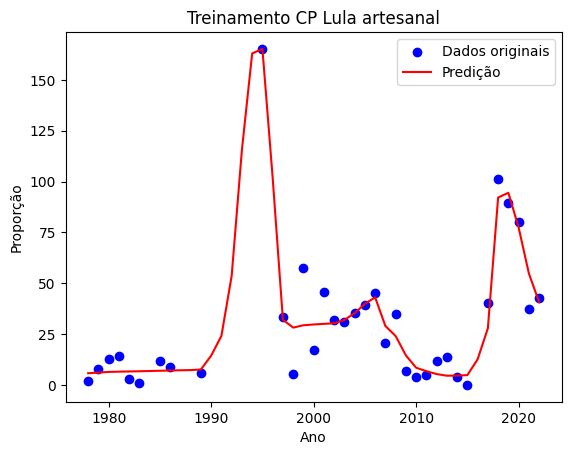

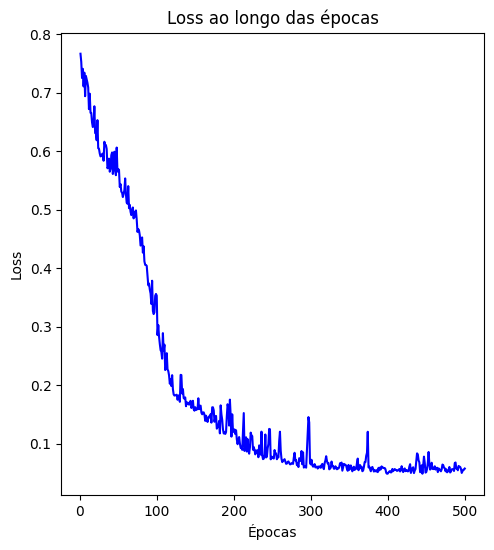

In [139]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Treinamento CP Lula artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição para o ano 1990: 15.2437744140625
Predição para o ano 1991: 23.3700008392334
Predição para o ano 1992: 38.13739776611328
Predição para o ano 1993: 82.29930114746094
Predição para o ano 1994: 128.02879333496094
Predição para o ano 2016: 19.54189682006836


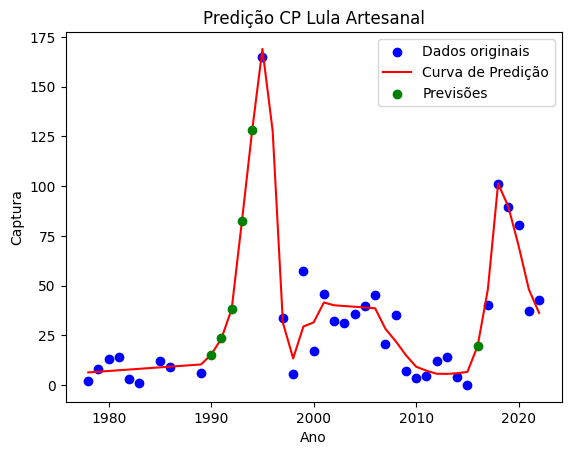

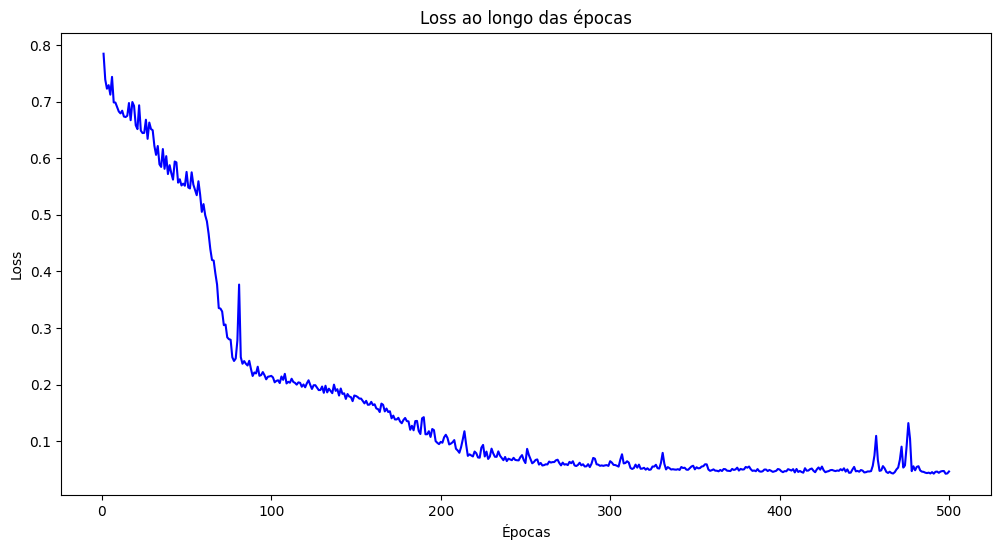

In [69]:
anos_para_prever = np.array([1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Lula Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()